In [1]:
# Load needed packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Experiment 3 (data processing, continued)
lines = [line.rstrip('\n') for line in open('experiment_results/experiment3.txt')]

Guard_time_points = []
Sensor_time_points = []
Camera_time_points = []

detect_time_points = []

parsed_lines = [line for line in lines if (line[0:15]=='Receiving:'.rjust(15) or line[0:15]=='Warning:'.rjust(15))]
packet_time = None
for line in parsed_lines:
    if len(line) > 70:
        IoT_device_name = line[72:]
        packet_time = float(line[25:48])
        if IoT_device_name == 'Sensor':
            Sensor_time_points.append(packet_time)
        elif IoT_device_name == 'Camera':
            Camera_time_points.append(packet_time)
        elif IoT_device_name == 'Guard':
            Guard_time_points.append(packet_time)
        else:
            pass
    else:
        detect_time_points.append(packet_time)
        
min_val = Guard_time_points[0]
        
Guard_time_points = np.array(Guard_time_points) - min_val
Camera_time_points = np.array(Camera_time_points) - min_val
Sensor_time_points = np.array(Sensor_time_points) - min_val
detect_time_points = np.array(detect_time_points) - min_val

detect_time_points = [int(d) for d in detect_time_points]
detect_time_points = list(set(detect_time_points))
print(detect_time_points)
detect_time_points = [49, 157, 328, 475]

[156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484]


In [3]:
# Experiment 3 (define draw functions, continued)
def draw_single_traffic(time_points, title, color=None):
    height, width = 15, 5
    plt.figure(figsize=(height, width))
    ones = np.ones(len(time_points))
    plt.bar(time_points, ones, color=color, width=0.5) 
    plt.title(title)
    plt.xlabel('Time (sec)')
    plt.yticks([])
    plt.xlim(0, 500)
    plt.show()
    
def draw_single_traffic_with_detection(time_points, title, color=None):
    height, width = 15, 5
    plt.figure(figsize=(height, width))
    ones = np.ones(len(time_points))
    plt.bar(time_points, ones, color=color, width=0.5) 
    ones = np.ones(len(detect_time_points))
    plt.bar(detect_time_points, ones, color='r', width=2) 
    plt.title(title)
    plt.xlabel('Time (sec)')
    plt.yticks([])
    plt.xlim(0, 500)
    plt.show()

def draw_combined_traffic():
    # Combined traffic at the middlebox
    height, width = 15, 5
    plt.figure(figsize=(height, width))
    
    ones = np.ones(len(Guard_time_points))
    plt.bar(Guard_time_points, ones, width=0.5) 
    ones = np.ones(len(Sensor_time_points))
    plt.bar(Sensor_time_points, ones, color='orange', width=0.5) 
    ones = np.ones(len(Camera_time_points))
    plt.bar(Camera_time_points, ones, color='g', width=0.5) 
    
    ones = np.ones(len(detect_time_points))
    plt.bar(detect_time_points, ones, color='r', width=2) 
    
    plt.title('Combined traffic at the middlebox')
    plt.xlabel('Time (sec)')
    plt.legend(['Guard', 'Sensor', 'Camera', 'Detection'], loc='upper right')
    plt.yticks([])
    plt.xlim(0, 500)
    plt.show()

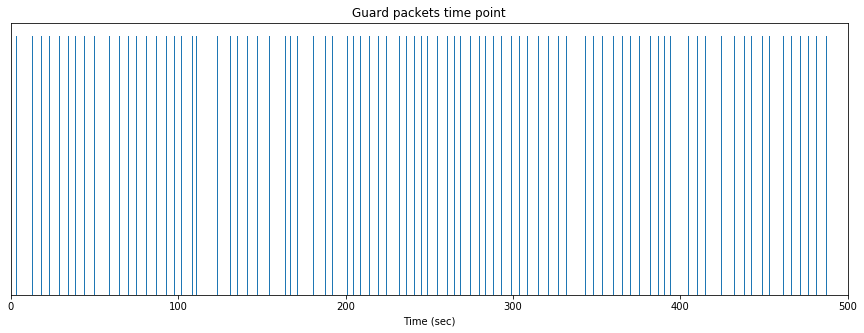

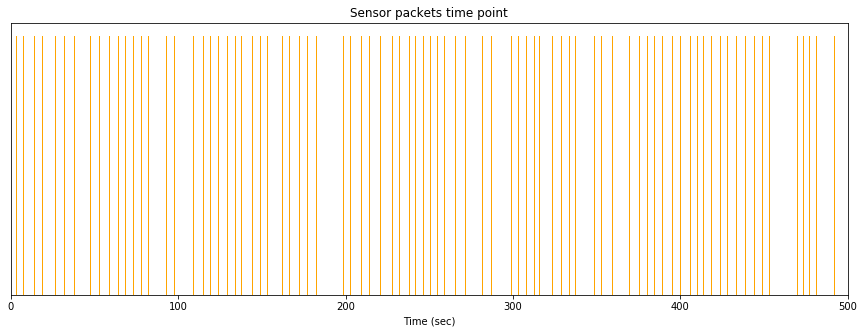

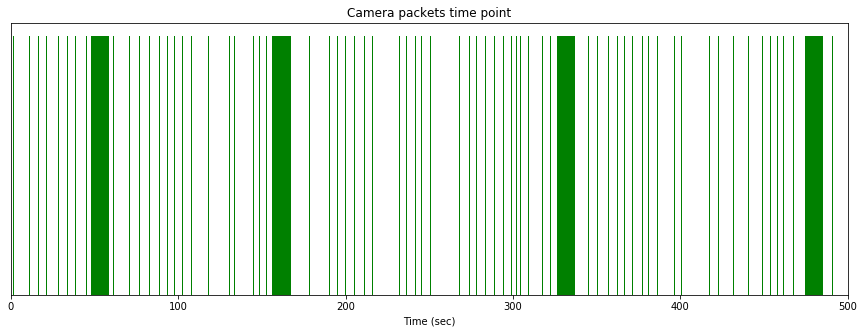

In [4]:
# Experiment 3 (visualize, continued)
draw_single_traffic(Guard_time_points, 'Guard packets time point', None)
draw_single_traffic(Sensor_time_points, 'Sensor packets time point', 'orange') 
draw_single_traffic(Camera_time_points, 'Camera packets time point', 'g') 

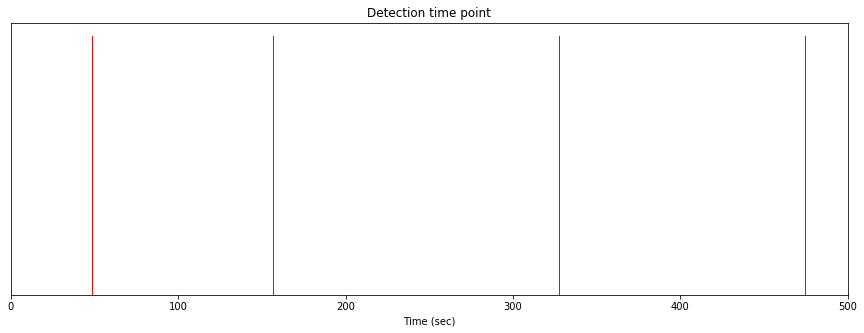

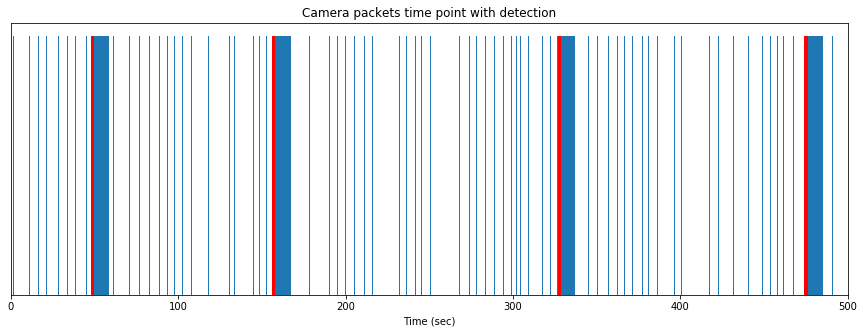

In [5]:
# Experiment 3 (visualize, continued)
draw_single_traffic(detect_time_points, 'Detection time point', 'r') 
draw_single_traffic_with_detection(Camera_time_points, 'Camera packets time point with detection', None)

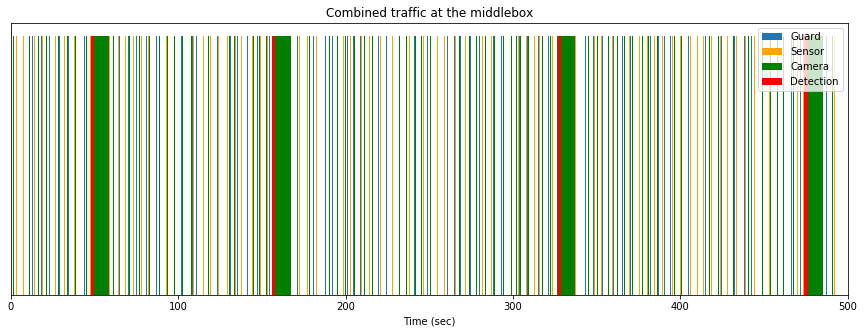

In [6]:
# Experiment 3 (visualize, continued)
draw_combined_traffic()